In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy

Read in data

In [3]:
# Station data (rel is for relating stage stations to stations in upstream watersheds)
stations_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\station_data\station_data.csv'
stations_rel_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\station_data\watershed_station_rel.csv'

stations_df = pd.read_csv(stations_path)
stage_stations_df = stations_df[stations_df['On_Major_River'] == 1]
stations_rel_df = pd.read_csv(stations_rel_path)

stage_stations_df

,Nombre,ID,Code,UTM_17_E,UTM_17_N,Elevación_pie,Elevación_m,Latitud_Norte,Longitud_Oeste,Tipo_de_Estación,Parámetros,Área_de_drenaje__km2_,Río_o_Lago_o_Mar,On_Major_River
9,Candelaria,CDL,51,662280,1037658,320.0,97.5,09 23 02.73,79 31 19.69,Pluviográfica / Fluviográfica,PFQQs,145.0,Pequení,1
11,Caño Quebrado Abajo,CQA,7,629055,995728,106.0,32.4,09 00 21.78,79 49 33.29,Fluviográfica,FQQs,68.2,Caño Quebrado,1
15,Chico,CHI,53,663699,1024320,340.0,104.0,09 15 48.37,79 30 35.03,Pluviográfica / Fluviográfica,PFQQs,407.0,Chagres,1
17,Ciento,CNT,52,637639,1028822,125.0,38.1,09 18 18.20,79 44 48.43,Pluviográfica / Fluviográfica,PFQQs,119.0,Gatún,1
22,El Chorro,CHR,48,610996,992291,140.0,42.7,08 58 31.63,79 59 24.99,Pluviográfica / Fluviográfica,PFQQs,171.0,Trinidad,1
34,Guarumal,GRM,13,662555,1017786,309.0,94.2,09 12 15.84,79 31 13.40,Fluviográfica,FQ,80.4,Indio Este,1
41,Los Cañones,CAN,18,602841,989044,340.0,104.0,08 56 46.62,80 03 52.31,Pluviográfica / Fluviográfica,PFQQs,192.0,Cirí Grande,1
46,Peluca,PEL,45,658016,1037392,350.0,107.0,09 22 54.65,79 33 39.49,Pluviográfica / Fluviográfica,PFQQs,90.6,Boquerón,1


In [4]:
# Hydro data
precip_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\precip_data\precip_hourly.csv'
stage_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\stage_data\river_stage_hourly.csv'

date_cols = ['Start of Interval (UTC)', 'End of Interval (UTC)']

precip_df = pd.read_csv(precip_path, parse_dates=date_cols)
stage_df = pd.read_csv(stage_path, parse_dates=date_cols)

rename_cols = {
    'Start of Interval (UTC)': 'Start',
    'End of Interval (UTC)': 'End',
}

precip_df.rename(columns=rename_cols, inplace=True)
stage_df.rename(columns=rename_cols, inplace=True)

Set time range and station

In [5]:
station_id = 'CNT'

year = 2024
start_date = pd.to_datetime(f"01-01-{year}", dayfirst=True)
end_date = pd.to_datetime(f"01-01-{year+1}", dayfirst=True)

In [6]:
precip_mask = (precip_df['Start'] >= start_date) & (precip_df['End'] <= end_date) & (precip_df['Station Code'] == station_id)
clip_precip_df = precip_df[precip_mask]

stage_mask = (stage_df['Start'] >= start_date) & (stage_df['End'] <= end_date) & (stage_df['Station Code'] == station_id)
clip_stage_df = stage_df[stage_mask]

Graph precip and stage for a station

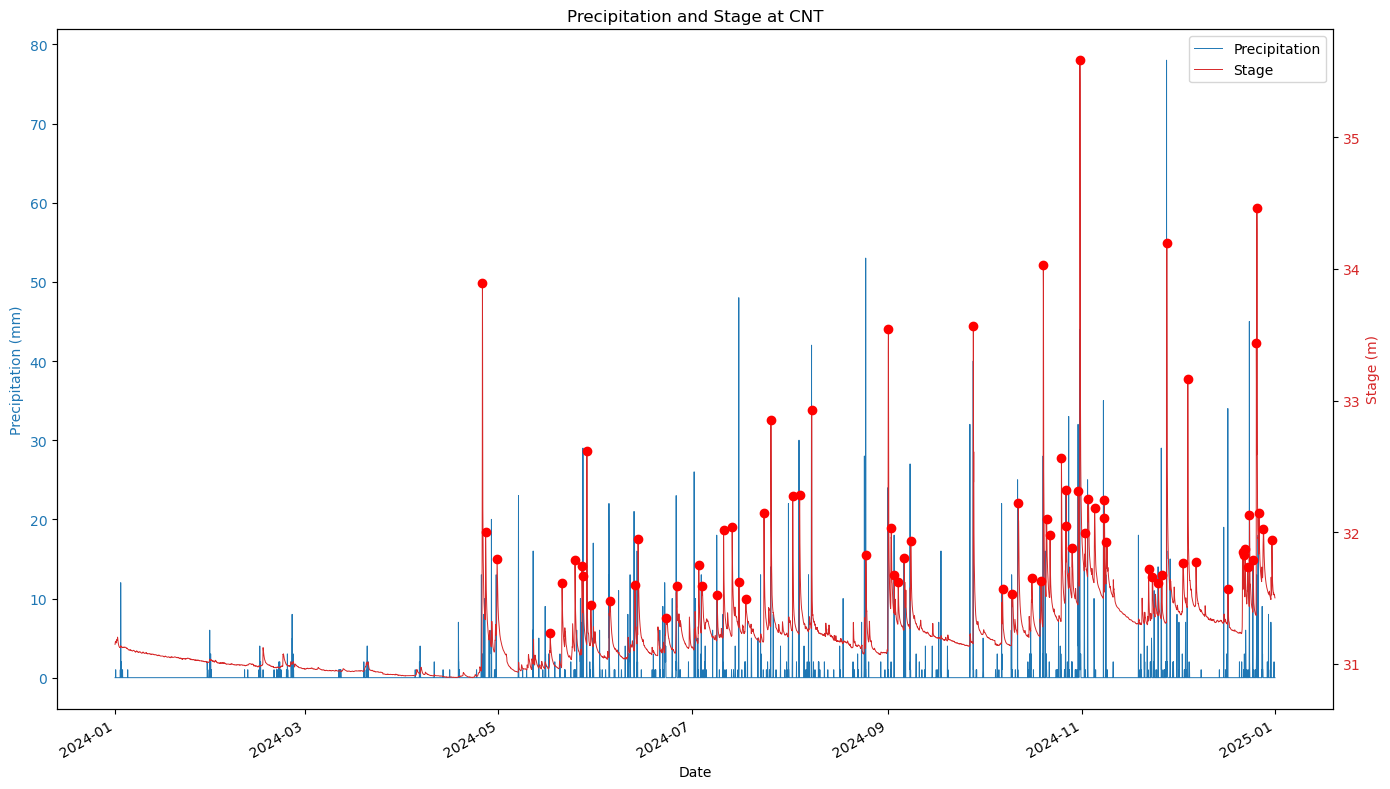

In [7]:
# Create the dual-axis plot
fig, precip_ax = plt.subplots(figsize=(14, 8))

# Plot precipitation data on left y-axis
color = 'tab:blue'
precip_ax.set_xlabel('Date')
precip_ax.set_ylabel('Precipitation (mm)', color=color)
precip_ax.plot(clip_precip_df['End'], clip_precip_df['Value'], color=color, linewidth=0.7, label='Precipitation')
precip_ax.tick_params(axis='y', labelcolor=color)

# Create second y-axis for stage data
stage_ax = precip_ax.twinx()
color = 'tab:red'
stage_ax.set_ylabel('Stage (m)', color=color)
stage_ax.plot(clip_stage_df['End'], clip_stage_df['Value'], color=color, linewidth=0.7, label='Stage')
stage_ax.tick_params(axis='y', labelcolor=color)

# Add local maxes
stage_peaks, _ = scipy.signal.find_peaks(clip_stage_df['Value'], prominence=0.25, distance=3)#height=82)
stage_ax.plot(clip_stage_df['End'].iloc[stage_peaks], clip_stage_df['Value'].iloc[stage_peaks], 'ro')

# Create combined legend
lines1, labels1 = precip_ax.get_legend_handles_labels()
lines2, labels2 = stage_ax.get_legend_handles_labels()
stage_ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add title
plt.title(f'Precipitation and Stage at {station_id}')

# Format the x-axis to show dates nicely
fig.autofmt_xdate()
plt.tight_layout()

# Show the plot
plt.show()

Blasphemy

In [8]:
peakspath = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\lag_data\norm_lag.csv'
peaks_df = pd.read_csv(peakspath, parse_dates=['StageTime', 'PrecipTime'])
peaks_df

,StageTime,StageStation,StageValue,PrecipTime,PrecipStation,PrecipValue
0,2015-05-02 07:00:00,CNT,0.126564,2015-05-01 21:00:00,CNT,4.0
1,2015-05-21 22:00:00,CNT,-0.231642,2015-05-21 20:00:00,CNT,18.0
2,2015-05-22 12:00:00,CNT,-0.041957,2015-05-22 01:00:00,CNT,2.0
3,2015-05-25 15:00:00,CNT,4.344346,2015-05-25 10:00:00,CNT,6.0
4,2015-05-29 06:00:00,CNT,0.380224,2015-05-28 21:00:00,CNT,5.0
...,...,...,...,...,...,...
3839,2024-12-24 05:00:00,CHI,1.131552,2024-12-23 22:00:00,CHI,14.0
3840,2024-12-26 05:00:00,CHI,1.097073,2024-12-25 18:00:00,CHI,2.0
3841,2024-12-27 03:00:00,CHI,2.397059,2024-12-26 23:00:00,CHI,1.0
3842,2024-12-28 10:00:00,CHI,0.531362,2024-12-28 09:00:00,CHI,5.0


In [9]:
peaks_mask = (peaks_df['StageTime'] >= start_date) & (peaks_df['StageTime'] <= end_date) & (peaks_df['StageStation'] == station_id)
clip_peaks_df = peaks_df[peaks_mask]

(np.float64(19704.74375), np.float64(20107.297916666666)) (np.float64(-3.9000000000000004), np.float64(81.9))
(np.float64(19704.74375), np.float64(20107.297916666666)) (np.float64(-2.0575448468917337), np.float64(37.37792118318532))


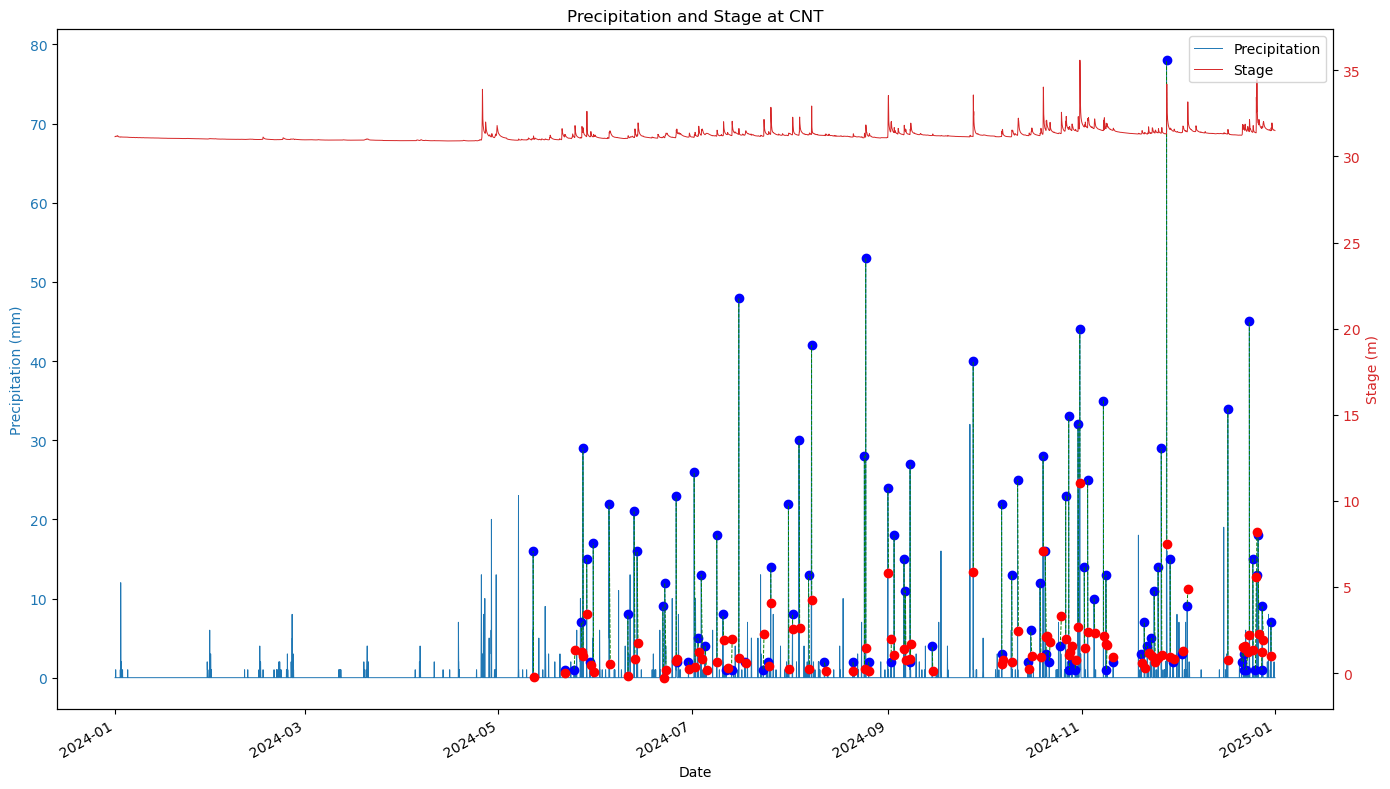

In [10]:
import matplotlib.dates as mdates

# Create the dual-axis plot
fig, precip_ax = plt.subplots(figsize=(14, 8))

# Plot precipitation data on left y-axis
color = 'tab:blue'
precip_ax.set_xlabel('Date')
precip_ax.set_ylabel('Precipitation (mm)', color=color)
precip_ax.plot(clip_precip_df['End'], clip_precip_df['Value'], color=color, linewidth=0.7, label='Precipitation')
precip_ax.tick_params(axis='y', labelcolor=color)

# Create second y-axis for stage data
stage_ax = precip_ax.twinx()
color = 'tab:red'
stage_ax.set_ylabel('Stage (m)', color=color)
stage_ax.plot(clip_stage_df['End'], clip_stage_df['Value'], color=color, linewidth=0.7, label='Stage')
stage_ax.tick_params(axis='y', labelcolor=color)

# Plot peaks points
stage_ax.plot(clip_peaks_df['StageTime'], clip_peaks_df['StageValue'], 'ro')
precip_ax.plot(clip_peaks_df['PrecipTime'], clip_peaks_df['PrecipValue'], 'bo')

# Force pyplot to recalculate the limits, which is necessary for the next step
print(precip_ax.get_xlim(), precip_ax.get_ylim())
print(stage_ax.get_xlim(), stage_ax.get_ylim())

# Connect associated peaks with lines
for row in clip_peaks_df.itertuples():
    # Convert to axis coordinates
    stage_display = stage_ax.transLimits.transform(
        (mdates.date2num(row.StageTime), row.StageValue)
    )
    precip_display = precip_ax.transLimits.transform(
        (mdates.date2num(row.PrecipTime), row.PrecipValue)
    )

    # Convert back to precip_ax data coordinates
    # I realize doing these steps for stage is redundant, but it illustrates the process
    stage_ax1 = precip_ax.transLimits.inverted().transform(stage_display)
    precip_ax1 = precip_ax.transLimits.inverted().transform(precip_display)

    xs = [stage_ax1[0], precip_ax1[0]]
    ys = [stage_ax1[1], precip_ax1[1]]

    precip_ax.plot(xs, ys, 'g--', linewidth=0.7)

# Create combined legend
lines1, labels1 = precip_ax.get_legend_handles_labels()
lines2, labels2 = stage_ax.get_legend_handles_labels()
stage_ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add title
plt.title(f'Precipitation and Stage at {station_id}')

# Format the x-axis to show dates nicely
fig.autofmt_xdate()
plt.tight_layout()

# Show the plot
plt.show()

Exploratory statistics on lag times

In [11]:
import numpy as np


lag_df = peaks_df.copy()
lag_df['Lag'] = lag_df['StageTime'] - lag_df['PrecipTime']
lag_df['Lag'] = lag_df['Lag'] / np.timedelta64(1, 'h') #convert to hours

lag_df

,StageTime,StageStation,StageValue,PrecipTime,PrecipStation,PrecipValue,Lag
0,2015-05-02 07:00:00,CNT,0.126564,2015-05-01 21:00:00,CNT,4.0,10.0
1,2015-05-21 22:00:00,CNT,-0.231642,2015-05-21 20:00:00,CNT,18.0,2.0
2,2015-05-22 12:00:00,CNT,-0.041957,2015-05-22 01:00:00,CNT,2.0,11.0
3,2015-05-25 15:00:00,CNT,4.344346,2015-05-25 10:00:00,CNT,6.0,5.0
4,2015-05-29 06:00:00,CNT,0.380224,2015-05-28 21:00:00,CNT,5.0,9.0
...,...,...,...,...,...,...,...
3839,2024-12-24 05:00:00,CHI,1.131552,2024-12-23 22:00:00,CHI,14.0,7.0
3840,2024-12-26 05:00:00,CHI,1.097073,2024-12-25 18:00:00,CHI,2.0,11.0
3841,2024-12-27 03:00:00,CHI,2.397059,2024-12-26 23:00:00,CHI,1.0,4.0
3842,2024-12-28 10:00:00,CHI,0.531362,2024-12-28 09:00:00,CHI,5.0,1.0


In [ ]:
lag_gb = lag_df.groupby([lag_df['StageTime'].dt.year.rename('year'), lag_df['StageStation']])
yearly_lag_means = lag_gb['Lag'].mean().reset_index()
yearly_lag_std = lag_gb['Lag'].std().reset_index()

yearly_lag_means.rename(columns={'Lag': 'LagMean'}, inplace=True)
yearly_lag_std.rename(columns={'Lag': 'LagStd'}, inplace=True)

yearly_lag_data = pd.merge(yearly_lag_means, yearly_lag_std, on=['year', 'StageStation'])

yearly_lag_data

,year,StageStation,LagMean,LagStd
0,2015,CDL,3.698630,2.190161
1,2015,CNT,5.517857,3.297333
2,2015,GRM,4.982456,2.573847
3,2015,PEL,3.555556,2.013258
4,2016,CDL,3.495146,2.317342
5,2016,CNT,4.222222,2.799644
6,2016,GRM,3.430556,1.934319
7,2016,PEL,3.785714,2.001288
8,2017,CDL,3.757576,2.499351
9,2017,CNT,5.127273,3.442945


In [ ]:
type(yearly_lag_means)
print(yearly_lag_means.index)
stations = lag_df['StageStation'].unique().tolist()
stations

RangeIndex(start=0, stop=43, step=1)


['CNT', 'PEL', 'CDL', 'GRM', 'CHI']

In [ ]:
lag_df_slice = lag_df[lag_df['StageTime'] > pd.Timestamp('2022-01-01')]
lag_station_gb = lag_df.groupby(lag_df['StageStation'])
full_lag_means = lag_station_gb['Lag'].mean().reset_index().rename(columns={'Lag': 'LagMean'})
full_lag_std = lag_station_gb['Lag'].std().reset_index().rename(columns={'Lag': 'LagStd'})
full_lag_med = lag_station_gb['Lag'].median().reset_index().rename(columns={'Lag': 'LagMed'})
full_lag_data = pd.merge(full_lag_means, full_lag_std, on='StageStation')
full_lag_data = pd.merge(full_lag_data, full_lag_med, on='StageStation')

full_lag_data.sort_values(by='LagMean', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(full_lag_data['StageStation'], full_lag_data['LagMean'], full_lag_data['LagStd'], None, 'o')
ax.plot(full_lag_data['StageStation'], full_lag_data['LagMed'], 'o')

ax.legend()
plt.show()

TypeError: '>' not supported between instances of 'SeriesGroupBy' and 'Timestamp'

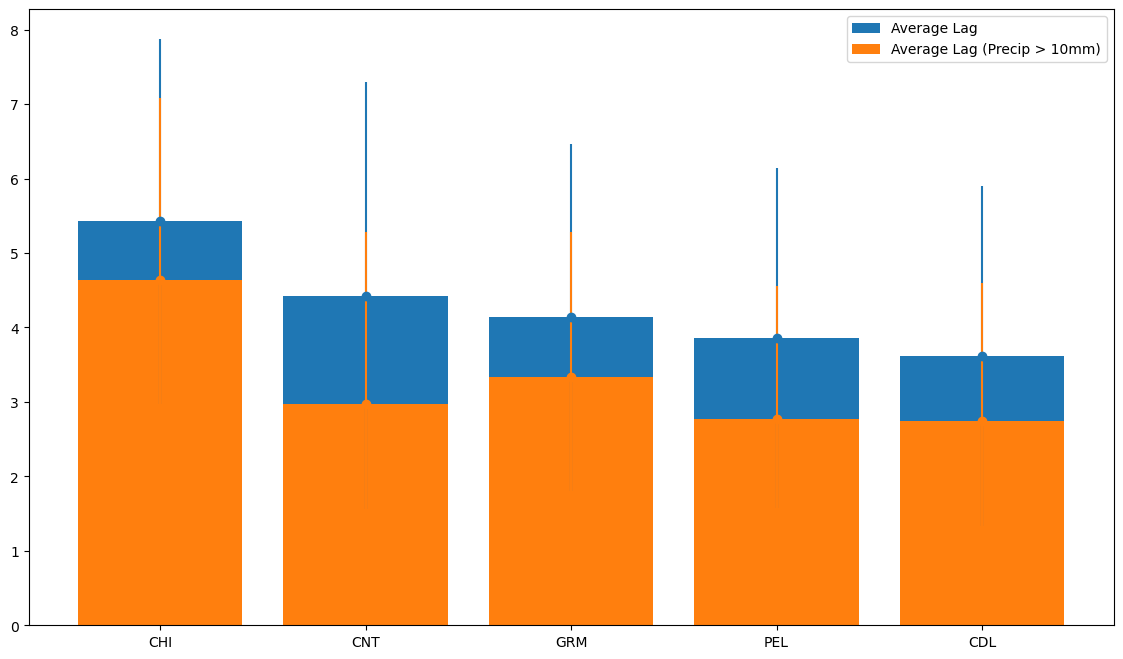

In [ ]:
lag_df_large_precip = lag_df[lag_df['PrecipValue'] > 10]

lag_station_gb = lag_df_large_precip.groupby(lag_df_large_precip['StageStation'])
full_lag_means = lag_station_gb['Lag'].mean().reset_index().rename(columns={'Lag': 'LagMean'})
full_lag_std = lag_station_gb['Lag'].std().reset_index().rename(columns={'Lag': 'LagStd'})
full_lag_data_large_precip = pd.merge(full_lag_means, full_lag_std, on='StageStation')

full_lag_data_large_precip.sort_values(by='LagMean', ascending=False, inplace=True)


fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(full_lag_data['StageStation'], full_lag_data['LagMean'], full_lag_data['LagStd'], None, 'o')
ax.errorbar(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMean'], full_lag_data_large_precip['LagStd'], None, 'o')
#ax.plot(full_lag_data['StageStation'], full_lag_data['LagMean'], 'o', label="Average Lag")
#ax.plot(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMean'], 'o', label="Average Lag (Precip > 10mm)")
ax.bar(full_lag_data['StageStation'], full_lag_data['LagMean'], label="Average Lag")
ax.bar(full_lag_data_large_precip['StageStation'], full_lag_data_large_precip['LagMean'], label="Average Lag (Precip > 10mm)")

ax.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

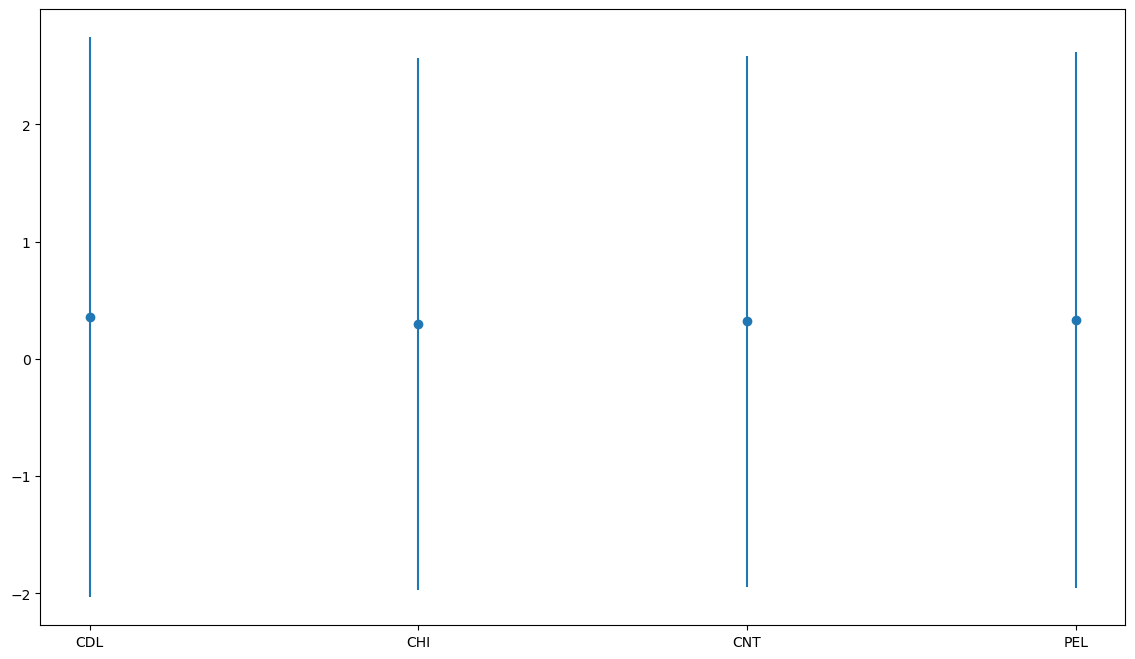

In [16]:
precip_station_gb = precip_df.groupby(precip_df['Station Code'])
precip_means = precip_station_gb['Value'].mean().reset_index().rename(columns={'Value': 'PrecipMean'})
precip_std = precip_station_gb['Value'].std().reset_index().rename(columns={'Value': 'PrecipStd'})
precip_stats = pd.merge(precip_means, precip_std, on='Station Code')

precip_stats_rivers = precip_stats[precip_stats['Station Code'].isin(stations)]

fig, ax = plt.subplots(figsize=(14, 8))
ax.errorbar(precip_stats_rivers['Station Code'], precip_stats_rivers['PrecipMean'], precip_stats_rivers['PrecipStd'], None, 'o', label="Average Precipitation")

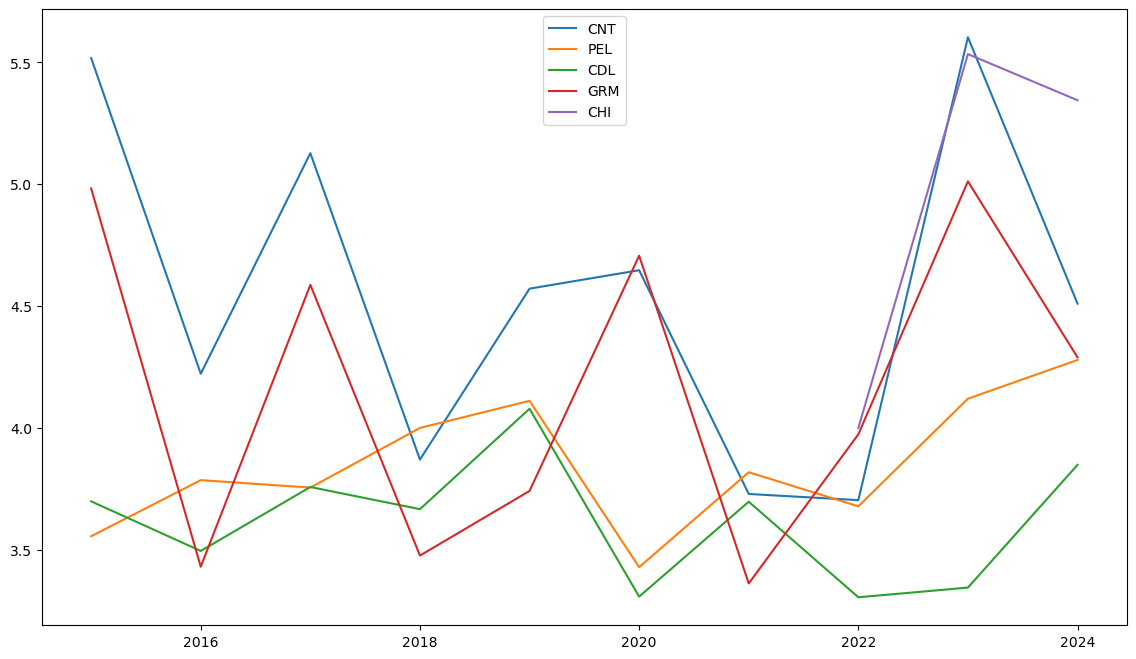

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))
for station_id in stations:
    yearly_means_slice = yearly_lag_data[yearly_lag_data['StageStation'] == station_id]
    ax.plot(yearly_means_slice['year'], yearly_means_slice['LagMean'], '-', label=station_id)

ax.legend()
plt.show()

In [23]:
lag_gb = lag_df.groupby([lag_df['StageTime'].dt.year.rename('year'), lag_df['StageTime'].dt.month.rename('month'), lag_df['StageStation']])
monthly_lag_means = lag_gb['Lag'].mean()
monthly_lag_means = monthly_lag_means.reset_index()
monthly_lag_means['date'] = pd.to_datetime(monthly_lag_means[['year', 'month']].assign(day=1))
monthly_lag_means

,year,month,StageStation,Lag,date
0,2015,5,CDL,4.454545,2015-05-01
1,2015,5,CNT,6.666667,2015-05-01
2,2015,5,GRM,5.666667,2015-05-01
3,2015,5,PEL,3.444444,2015-05-01
4,2015,6,CDL,3.833333,2015-06-01
...,...,...,...,...,...
323,2024,12,CDL,3.500000,2024-12-01
324,2024,12,CHI,5.545455,2024-12-01
325,2024,12,CNT,4.533333,2024-12-01
326,2024,12,GRM,4.000000,2024-12-01


In [24]:
type(monthly_lag_means)
print(monthly_lag_means.index)
stations = lag_df['StageStation'].unique().tolist()
stations

RangeIndex(start=0, stop=328, step=1)


['CNT', 'PEL', 'CDL', 'GRM', 'CHI']

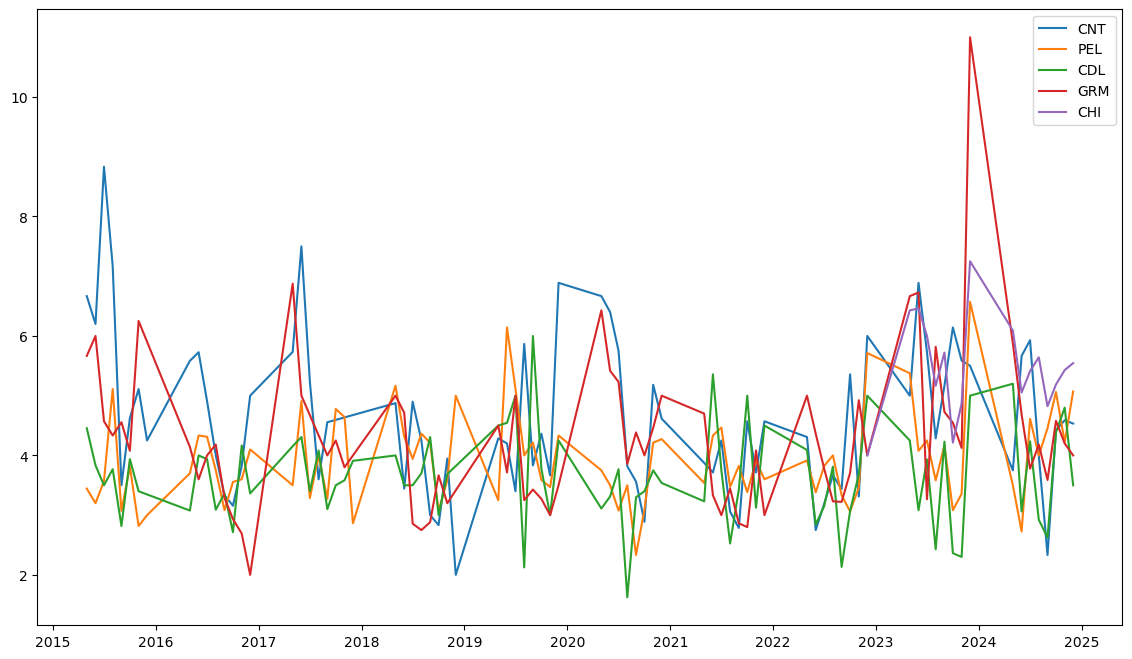

In [25]:
fig, ax = plt.subplots(figsize=(14, 8))
for station_id in stations:
    monthly_means_slice = monthly_lag_means[monthly_lag_means['StageStation'] == station_id]
    ax.plot(monthly_means_slice['date'], monthly_means_slice['Lag'], '-', label=station_id)

ax.legend()
plt.show()

In [ ]:
norm_stage_path = r'C:\Users\ianma\OneDrive - University of Redlands\GisCapstone\Data\hydro\stage_data\river_stage_hourly_norm.csv'

norm_stage_df = pd.read_csv(norm_stage_path, parse_dates=['Time'])

precip_df

,Start,End,Station Code,Sensor,Data Type,Value
0,2020-01-01 00:00:00,2020-01-01 01:00:00,ACL,Precipitation.Telemetria,Total (mm),0.0
1,2020-01-01 01:00:00,2020-01-01 02:00:00,ACL,Precipitation.Telemetria,Total (mm),0.0
2,2020-01-01 02:00:00,2020-01-01 03:00:00,ACL,Precipitation.Telemetria,Total (mm),0.0
3,2020-01-01 03:00:00,2020-01-01 04:00:00,ACL,Precipitation.Telemetria,Total (mm),0.0
4,2020-01-01 04:00:00,2020-01-01 05:00:00,ACL,Precipitation.Telemetria,Total (mm),0.0
...,...,...,...,...,...,...
2654385,2004-12-31 19:00:00,2004-12-31 20:00:00,VTM,Precipitation.Telemetria,Total (mm),0.0
2654386,2004-12-31 20:00:00,2004-12-31 21:00:00,VTM,Precipitation.Telemetria,Total (mm),0.0
2654387,2004-12-31 21:00:00,2004-12-31 22:00:00,VTM,Precipitation.Telemetria,Total (mm),0.0
2654388,2004-12-31 22:00:00,2004-12-31 23:00:00,VTM,Precipitation.Telemetria,Total (mm),0.0


In [ ]:
station = 'CNT'

station_precip_df = precip_df.rename(columns={'End': 'Time'})
station_precip_df = station_precip_df[station_precip_df['Station Code'] == station]

station_stage_df = stage_df.rename(columns={'End': 'Time'})
station_stage_df = station_stage_df[station_stage_df['Station Code'] == station]

station_norm_stage_df = norm_stage_df[norm_stage_df['Station Code'] == station]

year = 2024
start_date = pd.to_datetime(f"01-01-{year}", dayfirst=True)
end_date = pd.to_datetime(f"01-01-{year+1}", dayfirst=True)

station_precip_mask = (station_precip_df['Time'] >= start_date) & (station_precip_df['Time'] <= end_date)
clip_station_precip_df = station_precip_df[station_precip_mask]

station_stage_mask = (station_stage_df['Time'] >= start_date) & (station_stage_df['Time'] <= end_date)
clip_station_stage_df = station_stage_df[station_stage_mask]

station_norm_stage_mask = (station_norm_stage_df['Time'] >= start_date) & (station_norm_stage_df['Time'] <= end_date)
clip_station_norm_stage_df = station_norm_stage_df[station_norm_stage_mask]


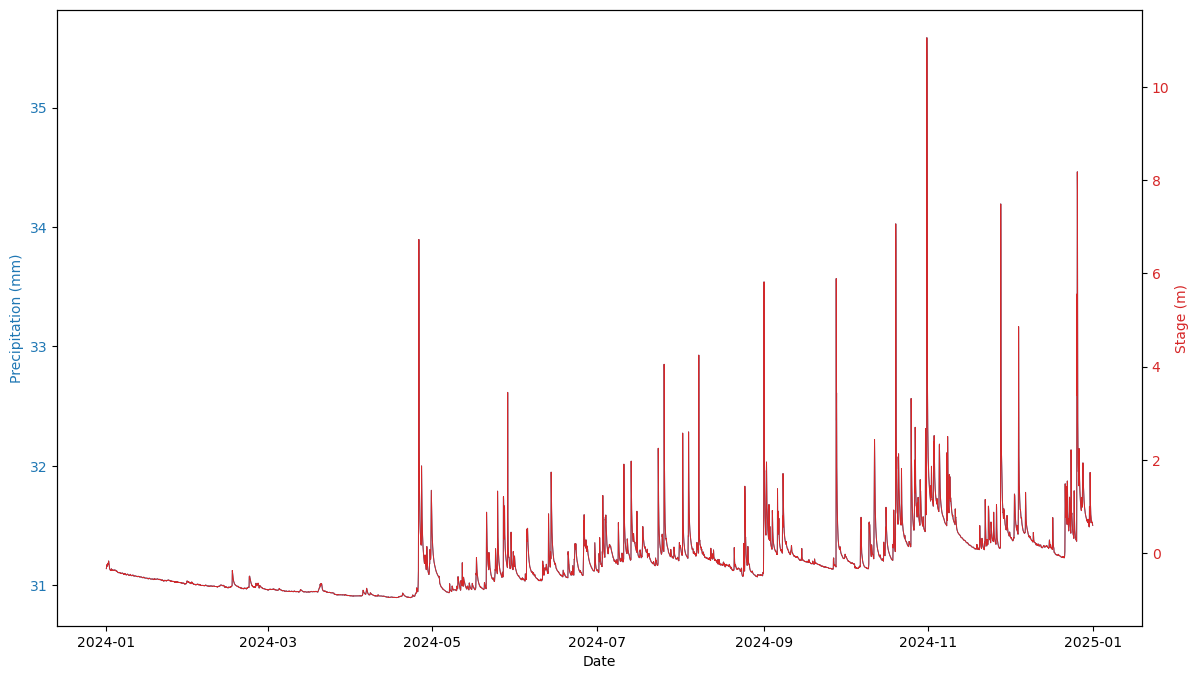

In [ ]:
fig, precip_ax = plt.subplots(figsize=(14, 8))

# Plot precipitation data on left y-axis
color = 'tab:blue'
precip_ax.set_xlabel('Date')
precip_ax.set_ylabel('Precipitation (mm)', color=color)
precip_ax.plot(clip_station_stage_df['Time'], clip_station_stage_df['Value'], color=color, linewidth=0.7, label='Precipitation')
precip_ax.tick_params(axis='y', labelcolor=color)

# Create second y-axis for stage data
stage_ax = precip_ax.twinx()
color = 'tab:red'
stage_ax.set_ylabel('Stage (m)', color=color)
stage_ax.plot(clip_station_norm_stage_df['Time'], clip_station_norm_stage_df['Value'], color=color, linewidth=0.7, label='Stage')
stage_ax.tick_params(axis='y', labelcolor=color)

